# importing libraries

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
sample_data = pd.read_csv('magic04.data')#reading data

In [9]:
sample_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


# visualization

# 1) correlation matrix

In [10]:
correlation=sample_data.corr()#using corr function to make the correlation matrix 

In [11]:
correlation

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.770512,0.702454,-0.630999,-0.598145,-0.368556,-0.119747,0.013389,-0.008777,0.418466
fWidth,0.770512,1.000000,0.717517,-0.609779,-0.581141,-0.266961,-0.176234,0.039744,0.066061,0.336816
fSize,0.702454,0.717517,1.000000,-0.850850,-0.808835,-0.159863,0.095157,0.015455,-0.186675,0.437041
fConc,-0.630999,-0.609779,-0.850850,1.000000,0.976412,0.112272,-0.121899,-0.011294,0.235272,-0.328332
fConc1,-0.598145,-0.581141,-0.808835,0.976412,1.000000,0.100159,-0.118769,-0.010966,0.229799,-0.304625
fAsym,-0.368556,-0.266961,-0.159863,0.112272,0.100159,1.000000,0.274045,0.002553,-0.055689,-0.206730
fM3Long,-0.119747,-0.176234,0.095157,-0.121899,-0.118769,0.274045,1.000000,-0.017197,-0.186275,0.037025
fM3Trans,0.013389,0.039744,0.015455,-0.011294,-0.010966,0.002553,-0.017197,1.000000,0.004659,0.011427
fAlpha,-0.008777,0.066061,-0.186675,0.235272,0.229799,-0.055689,-0.186275,0.004659,1.000000,-0.220556
fDist,0.418466,0.336816,0.437041,-0.328332,-0.304625,-0.206730,0.037025,0.011427,-0.220556,1.000000


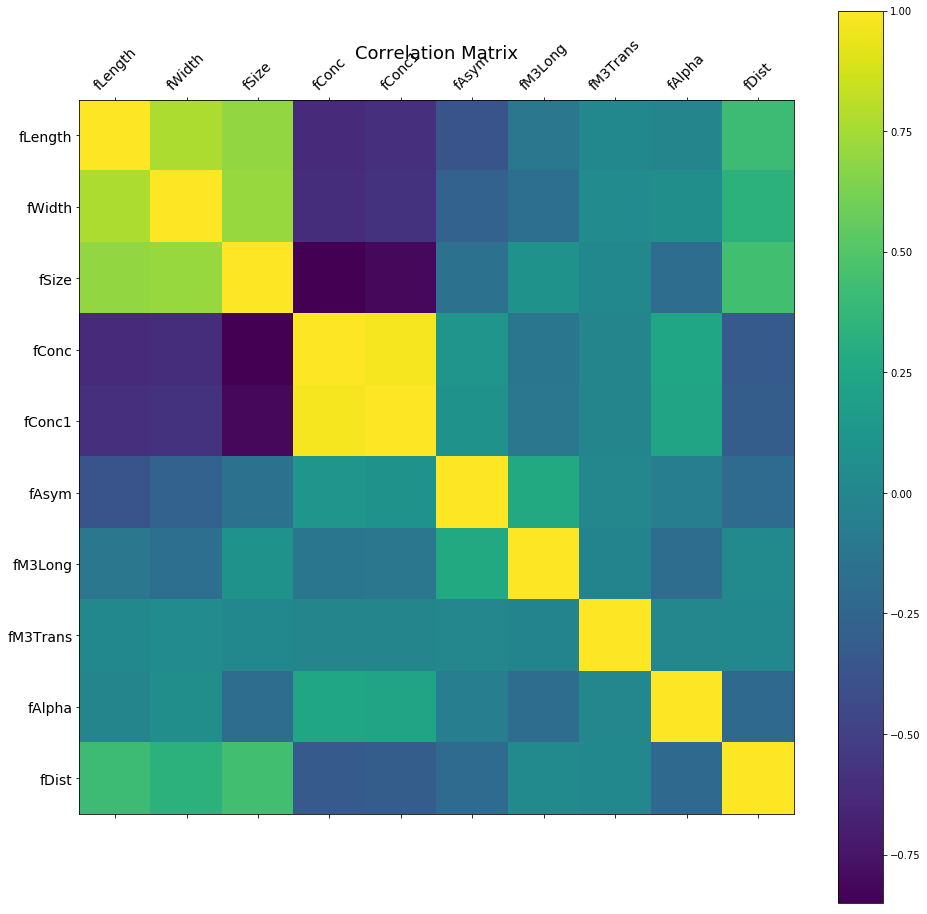

In [211]:
plt.matshow(correlation)#ploting the corrleation matrix
plt.xticks(range(correlation.shape[1]), correlation.columns, fontsize=14, rotation=45)#labeling the x axis and showing the range
plt.yticks(range(correlation.shape[1]), correlation.columns, fontsize=14)#labeling the y axis and showing the range
plt.rcParams["figure.figsize"] = (19,19)#the size of the figure
cb = plt.colorbar()#showing the color bar to see the range
plt.title('Correlation Matrix',fontsize=18);#title of the figure
plt.show()

# 2)histogram

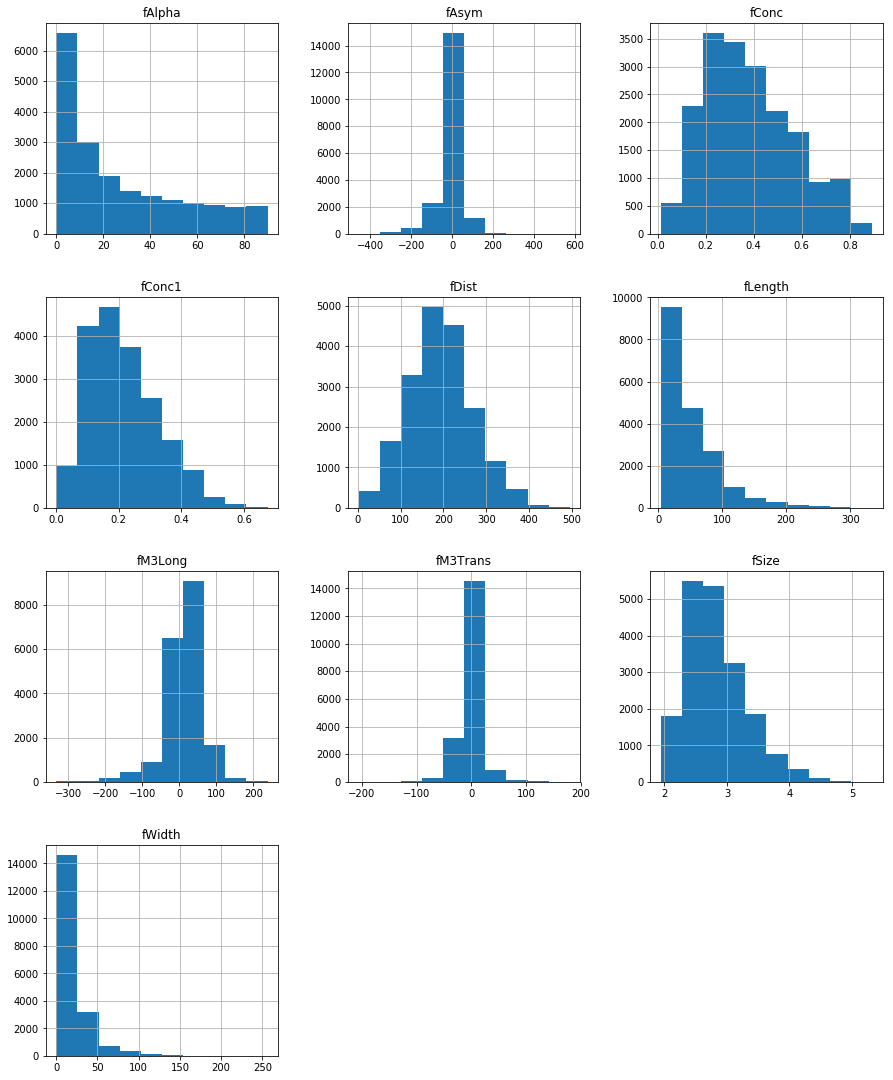

In [25]:
histogram=sample_data.hist()#using hist function to calculate the histogram
plt.rcParams["figure.figsize"] = (19,19)#the size of the figure
plt.show()

# 3)boxplot

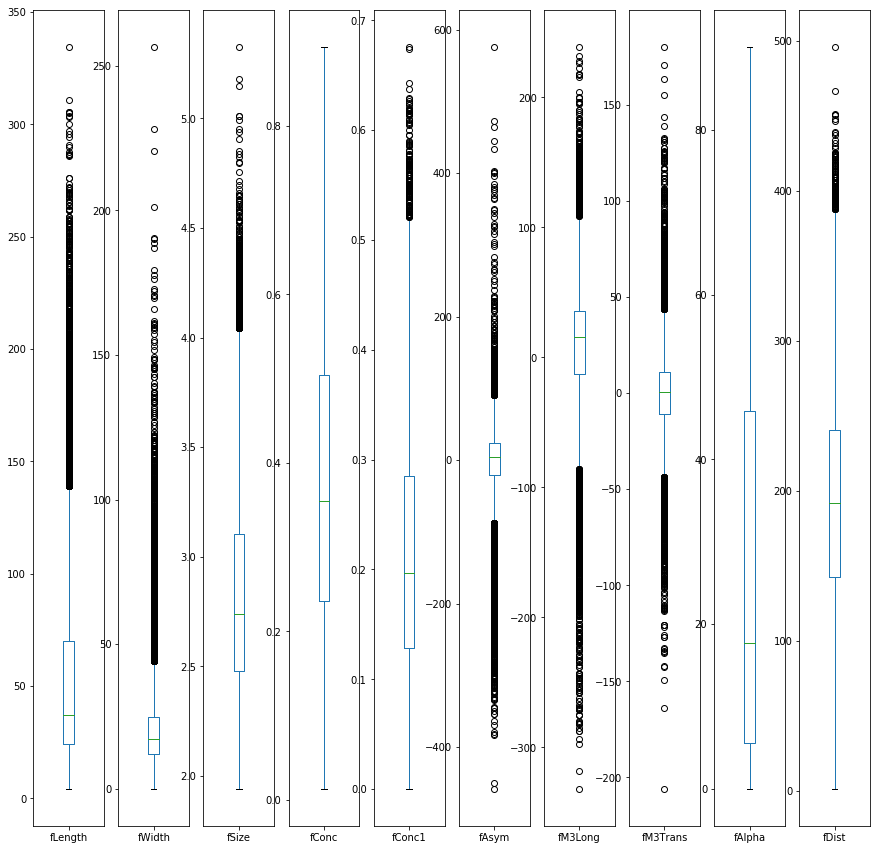

In [7]:
sample_data.plot(kind='box',subplots=True)#plotting the box plot
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

# 4) lineplot

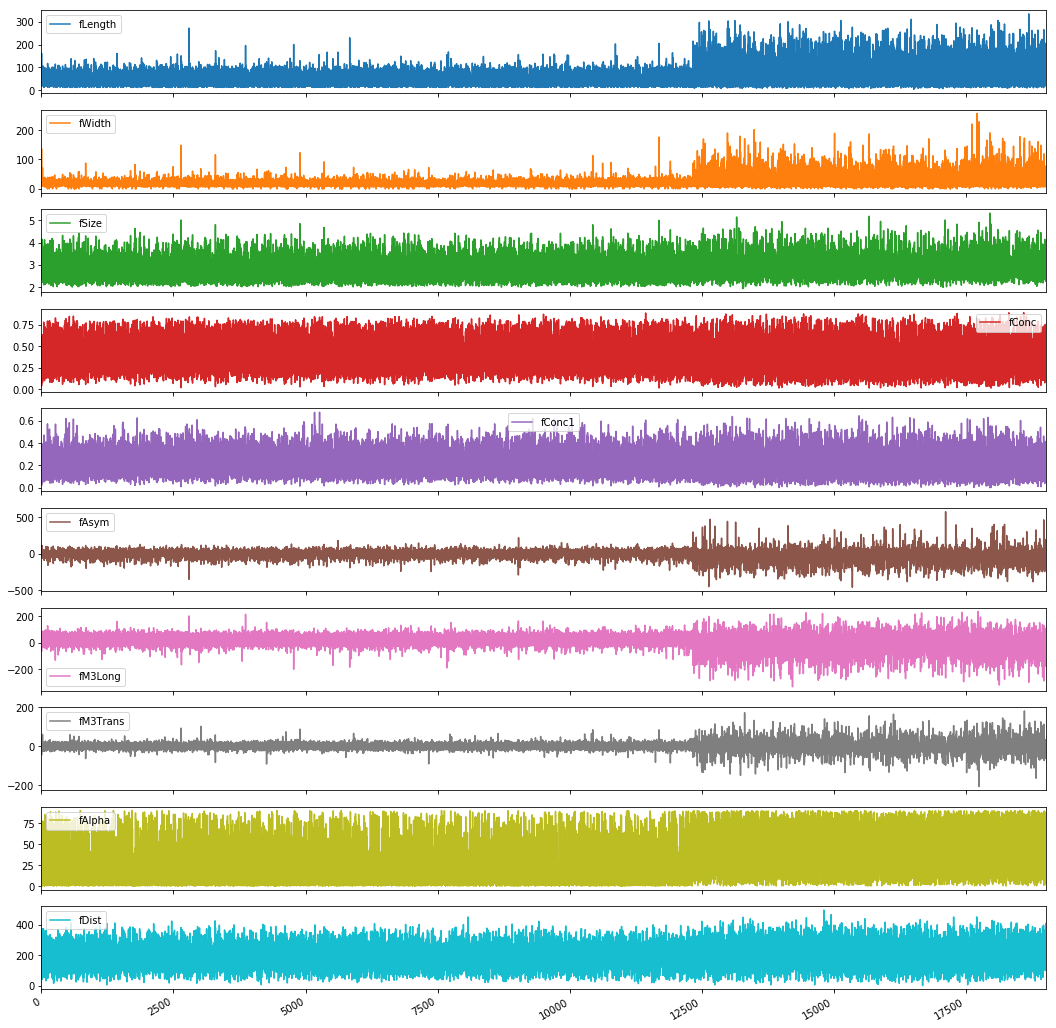

In [194]:
lines=sample_data.plot.line(subplots=True)#using line function to plot the line plot for every feature and the id in subplot
plt.rcParams["figure.figsize"] = (20,20)#the figure size

# split data

In [38]:
sample_data['class'].value_counts()#counting the number of the data ,number of 'g' values and 'h' values

g    12332
h     6688
Name: class, dtype: int64

In [61]:
n=5644#number of data to remove so that 'g' label and 'h' label be equal in size
#sample_data['class']=sample_data['class'].map(sample_data.eval)
#sample_data_dropped=sample_data.drop(sample_data[sample_data['class']].sample(n=n).index)
data_set=sample_data.drop(sample_data[sample_data['class']=='g'].sample(n=5644).index)#droping randomely the 'g' label
data_set['class'].value_counts()#counting  the number of 'g' and 'h' label .now both are equal in size

g    6688
h    6688
Name: class, dtype: int64

In [64]:
df = pd.DataFrame(data_set)#creating dataframe from data_set
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g
10,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.0940,g
11,18.8562,16.4600,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.4610,162.8480,g
14,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680,g
16,36.1741,17.6865,2.9460,0.2865,0.1591,-4.7746,-18.9697,11.3256,0.2540,191.4550,g


In [65]:
x=df.drop(columns=['class'])#to split the data to feature  and label ,X is the features
x

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510
10,62.7766,29.9104,3.3331,0.2475,0.1261,-33.9065,57.5848,23.7710,9.9144,323.0940
11,18.8562,16.4600,2.4385,0.5282,0.2933,25.1269,-6.5401,-16.9327,11.4610,162.8480
14,60.4580,33.1061,3.1944,0.4679,0.2464,14.3000,-33.8765,28.8315,8.2920,372.5680
16,36.1741,17.6865,2.9460,0.2865,0.1591,-4.7746,-18.9697,11.3256,0.2540,191.4550


In [66]:
y=df.drop(columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist'])#y is the label of the data
y

,class
1,g
4,g
5,g
7,g
8,g
9,g
10,g
11,g
14,g
16,g


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)#using train test split function from model selection to split the data to train set 70% and test set 30%

## classification without feature selection

# decision tree

In [131]:
clf_tree=DecisionTreeClassifier(criterion="gini",random_state=42)#creating decision tree classifier
scores_tree=cross_val_score(clf_tree,x_train,y_train,cv=10)#using cross val score function to split the train data set to 10% validation and get the score  
clf_tree.fit(x_train,y_train)#train the data using fit function
scores_tree

array([0.75453575, 0.79509072, 0.79188901, 0.79188901, 0.76282051,
       0.79594017, 0.78739316, 0.78525641, 0.79380342, 0.80962567])

In [133]:
avg_tree=np.average(scores_tree)#get the average of the scores
avg_tree

0.7868243826053483

In [138]:
dt_pred=clf_tree.predict(x_test)#using predict function to predict the label
print("accuracy : " ,metrics.accuracy_score(y_test,dt_pred)*100)#calculating the accuracy of the classifier
print("confusion matrix : ",metrics.confusion_matrix(y_test,dt_pred)*100)#prediction results on a classification problemThe number of correct and incorrect predictions are summarized with count values and broken down by each class
print("precision : ",metrics.precision_score(y_test,dt_pred,average="macro")*100)#calculating precision of the prediction
print("f_measure : ",metrics.f1_score(y_test,dt_pred,average="macro")*100)#calulating f measure of the prediction
print("recall : ",metrics.recall_score(y_test,dt_pred,average="macro")*100)#calculating the recall of the prediction 
print("################################################################################")

accuracy :  79.9651133815101
confusion matrix :  [[162200  40200]
 [ 40200 158700]]
precision :  79.96358926665832
f_measure :  79.96358926665832
recall :  79.96358926665832
################################################################################


# Adaboost

In [195]:
clf_adaboost=AdaBoostClassifier(n_estimators=50,random_state=42)
scores_adaboost=cross_val_score(clf_adaboost,x_train,y_train.values.ravel(),cv=10)
clf_adaboost.fit(x_train,y_train.values.ravel())
scores_adaboost

array([0.81750267, 0.8153682 , 0.8185699 , 0.8153682 , 0.80021368,
       0.8258547 , 0.79380342, 0.7991453 , 0.83333333, 0.82032086])

In [196]:
avg_adaboost=np.average(scores_adaboost)
avg_adaboost

0.8139480247746619

In [197]:
ab_pred=clf_adaboost.predict(x_test)
print("accuracy : " ,metrics.accuracy_score(y_test,ab_pred)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,ab_pred)*100)
print("precision : ",metrics.precision_score(y_test,ab_pred,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,ab_pred,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,ab_pred,average="macro")*100)
print("################################################################################")

accuracy :  81.46025417393471
confusion matrix :  [[166600  35800]
 [ 38600 160300]]
precision :  81.46654598988263
f_measure :  81.4556837803257
recall :  81.4527579553155
################################################################################


# KNN

In [200]:
clf_knn=KNeighborsClassifier(n_neighbors=5)
scores_knn=cross_val_score(clf_knn,x_train,y_train.values.ravel(),cv=10)
clf_knn.fit(x_train,y_train.values.ravel())
scores_knn

array([0.73639274, 0.78335112, 0.76947705, 0.7588047 , 0.76388889,
       0.77564103, 0.75641026, 0.7724359 , 0.76816239, 0.77647059])

In [96]:
avg_knn=np.average(scores_knn)
avg_knn

0.7661034663434375

In [144]:
knn_pred=clf_knn.predict(x_test)
print("accuracy : " ,metrics.accuracy_score(y_test,knn_pred)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,knn_pred)*100)
print("precision : ",metrics.precision_score(y_test,knn_pred,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,knn_pred,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,knn_pred,average="macro")*100)
print("################################################################################")

accuracy :  76.77547969100424
confusion matrix :  [[167800  34600]
 [ 58600 140300]]
precision :  77.16693739178572
f_measure :  76.66590302899627
recall :  76.72154855658692
################################################################################


# random forest

In [201]:
clf_randomforest=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
scores_randomforest=cross_val_score(clf_randomforest,x_train,y_train.values.ravel(),cv=10)
clf_randomforest.fit(x_train,y_train.values.ravel())
scores_randomforest

array([0.83457844, 0.84204909, 0.8601921 , 0.85485592, 0.83333333,
       0.86752137, 0.85576923, 0.86004274, 0.87713675, 0.86203209])

In [202]:
avg_randomforest=np.average(scores_randomforest)
avg_randomforest

0.8547511064663743

In [203]:
rf_pred=clf_randomforest.predict(x_test)
print("accuracy : " ,metrics.accuracy_score(y_test,rf_pred)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,rf_pred)*100)
print("precision : ",metrics.precision_score(y_test,rf_pred,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,rf_pred,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,rf_pred,average="macro")*100)
print("################################################################################")

accuracy :  85.94567655120858
confusion matrix :  [[180600  21800]
 [ 34600 164300]]
precision :  86.1039004492528
f_measure :  85.92245111210627
recall :  85.91678639632603
################################################################################


# logistic regression

In [151]:
clf_logreg=LogisticRegression(penalty='l2',random_state=42)
scores_logreg=cross_val_score(clf_logreg,x_train,y_train.values.ravel(),cv=10)
clf_logreg.fit(x_train,y_train)
scores_logreg

C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

array([0.75346852, 0.77801494, 0.78548559, 0.76840982, 0.76175214,
       0.77029915, 0.72649573, 0.77457265, 0.79380342, 0.79465241])

In [112]:
avg_logreg=np.average(scores_logreg)
avg_logreg

0.7706954352070179

In [152]:
logreg_pred=clf_logreg.predict(x_test)
print("accuracy : " ,metrics.accuracy_score(y_test,logreg_pred)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,logreg_pred)*100)
print("precision : ",metrics.precision_score(y_test,logreg_pred,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,logreg_pred,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,logreg_pred,average="macro")*100)
print("################################################################################")

accuracy :  77.2489409419387
confusion matrix :  [[166400  36000]
 [ 55300 143600]]
precision :  77.50591953451413
f_measure :  77.17526305608861
recall :  77.20526134848386
################################################################################


# classification with feature selection

# feature selection method

In [160]:
select =SelectKBest(k=5)#using selectkBest function to slect the top 5 feature that gives good results
select.fit(x_train,y_train.values.ravel())#slecting this from the data set
x_train_selected=select.transform(x_train)#r=transfrom the the x (features that chosen)
mask = select.get_support()#using get support function to know which feature used
mask#feature used are (length,width,fasym,m3long,falpha)

array([ True,  True, False, False, False,  True,  True, False,  True,
       False])

In [159]:
x_test_selected = select.transform(x_test)#transform the x test data

# descion tree (feature selected)

In [204]:
clf_tree_selected=DecisionTreeClassifier(criterion="gini",random_state=42)
scores_tree_selected=cross_val_score(clf_tree_selected,x_train_selected,y_train,cv=10)
clf_tree_selected.fit(x_train_selected,y_train)
scores_tree_selected

array([0.73745998, 0.76627535, 0.78762006, 0.74919957, 0.74679487,
       0.7542735 , 0.74145299, 0.75      , 0.77564103, 0.77754011])

In [205]:
dt_pred_selected=clf_tree_selected.predict(x_test_selected)
print("accuracy : " ,metrics.accuracy_score(y_test,dt_pred_selected)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,dt_pred_selected)*100)
print("precision : ",metrics.precision_score(y_test,dt_pred_selected,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,dt_pred_selected,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,dt_pred_selected,average="macro")*100)
print("################################################################################")

accuracy :  76.02790929479193
confusion matrix :  [[154200  48200]
 [ 48000 150900]]
precision :  76.02609368269975
f_measure :  76.02628813866663
recall :  76.02652036795259
################################################################################


# Adaboost (feature selected)

In [206]:
clf_adaboost_selected=AdaBoostClassifier(n_estimators=50,random_state=42)
scores_adaboost_selected=cross_val_score(clf_adaboost_selected,x_train_selected,y_train.values.ravel(),cv=10)
clf_adaboost_selected.fit(x_train_selected,y_train.values.ravel())
scores_adaboost_selected

array([0.76307364, 0.80576307, 0.79935966, 0.7886873 , 0.78205128,
       0.78632479, 0.77350427, 0.7767094 , 0.80128205, 0.80748663])

In [207]:
ab_pred_selected=clf_adaboost_selected.predict(x_test_selected)
print("accuracy : " ,metrics.accuracy_score(y_test,ab_pred_selected)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,ab_pred_selected)*100)
print("precision : ",metrics.precision_score(y_test,ab_pred_selected,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,ab_pred_selected,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,ab_pred_selected,average="macro")*100)
print("################################################################################")

accuracy :  79.51657114378271
confusion matrix :  [[162100  40300]
 [ 41900 157000]]
precision :  79.51751836061338
f_measure :  79.51326231085072
recall :  79.51153528199563
################################################################################


# random forest (feature selected)

In [208]:
clf_randomforest_selected=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
scores_randomforest_selected=cross_val_score(clf_randomforest_selected,x_train_selected,y_train.values.ravel(),cv=10)
clf_randomforest_selected.fit(x_train_selected,y_train.values.ravel())
scores_randomforest_selected

array([0.8036286 , 0.82390608, 0.84951974, 0.82710779, 0.81944444,
       0.82371795, 0.81730769, 0.81196581, 0.83333333, 0.83743316])

In [209]:
rf_pred_selected=clf_randomforest_selected.predict(x_test_selected)
print("accuracy : " ,metrics.accuracy_score(y_test,rf_pred_selected)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,rf_pred_selected)*100)
print("precision : ",metrics.precision_score(y_test,rf_pred_selected,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,rf_pred_selected,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,rf_pred_selected,average="macro")*100)
print("################################################################################")

accuracy :  82.28258160976826
confusion matrix :  [[175800  26600]
 [ 44500 154400]]
precision :  82.55206987959663
f_measure :  82.23205426851152
recall :  82.24232786253248
################################################################################


# logistic regression (feature selected)

In [169]:
clf_logreg_selected=LogisticRegression(penalty='l2',random_state=42)
scores_logreg_selected=cross_val_score(clf_logreg_selected,x_train_selected,y_train.values.ravel(),cv=10)
clf_logreg_selected.fit(x_train_selected,y_train.values.ravel())
scores_logreg_selected

C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALEX STORE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

array([0.76093917, 0.76947705, 0.78548559, 0.77694771, 0.76175214,
       0.77884615, 0.72863248, 0.76282051, 0.78952991, 0.78823529])

In [170]:
logreg_pred_selected=clf_logreg_selected.predict(x_test_selected)
print("accuracy : " ,metrics.accuracy_score(y_test,logreg_pred_selected)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,logreg_pred_selected)*100)
print("precision : ",metrics.precision_score(y_test,logreg_pred_selected,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,logreg_pred_selected,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,logreg_pred_selected,average="macro")*100)
print("################################################################################")

accuracy :  77.59780712683778
confusion matrix :  [[168900  33500]
 [ 56400 142500]]
precision :  77.96631007141993
f_measure :  77.50043297338178
recall :  77.54632941653402
################################################################################


# KNN (feature selected)

In [191]:
clf_knn_selected=KNeighborsClassifier(n_neighbors=5)
scores_knn_selected=cross_val_score(clf_knn_selected,x_train_selected,y_train.values.ravel(),cv=10)
clf_knn_selected.fit(x_train_selected,y_train.values.ravel())
scores_knn_selected

array([0.7588047 , 0.77694771, 0.80042689, 0.78655283, 0.76709402,
       0.79700855, 0.75106838, 0.78311966, 0.78418803, 0.79037433])

In [193]:
knn_pred_selected=clf_knn_selected.predict(x_test_selected)
print("accuracy : " ,metrics.accuracy_score(y_test,knn_pred_selected)*100)
print("confusion matrix : ",metrics.confusion_matrix(y_test,knn_pred_selected)*100)
print("precision : ",metrics.precision_score(y_test,knn_pred_selected,average="macro")*100)
print("f_measure : ",metrics.f1_score(y_test,knn_pred_selected,average="macro")*100)
print("recall : ",metrics.recall_score(y_test,knn_pred_selected,average="macro")*100)
print("################################################################################")

accuracy :  79.66608522302518
confusion matrix :  [[174600  27800]
 [ 53800 145100]]
precision :  80.18308772064879
f_measure :  79.555606167991
recall :  79.60802695457427
################################################################################
